In [2]:
#importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

In [3]:
#load the dataset
data = pd.read_csv('/Users/cmoradajr/Downloads/Wholesale customers data.csv')
data.head(5)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,delicatessen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [4]:
#descriptive statistics
data.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [5]:
#Assigning features
features = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'delicatessen']
X = data[features].values

In [7]:
#Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

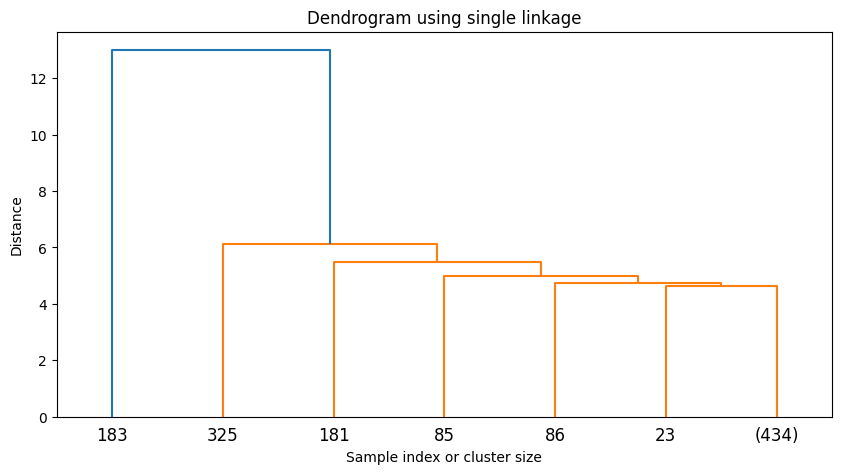

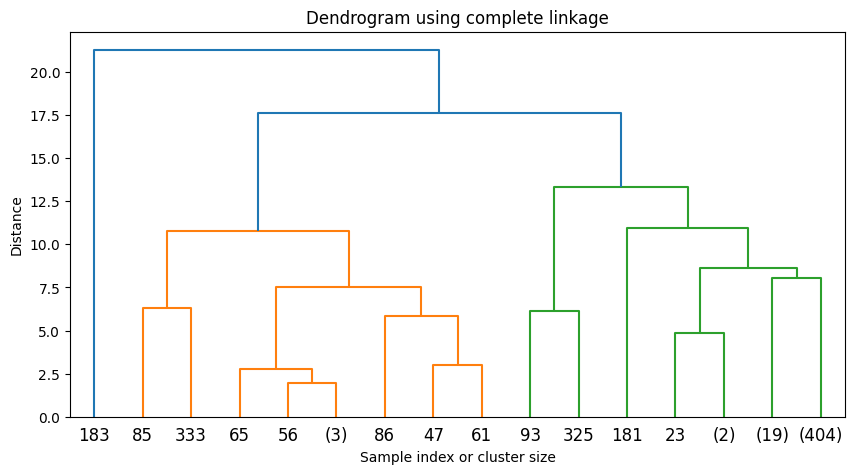

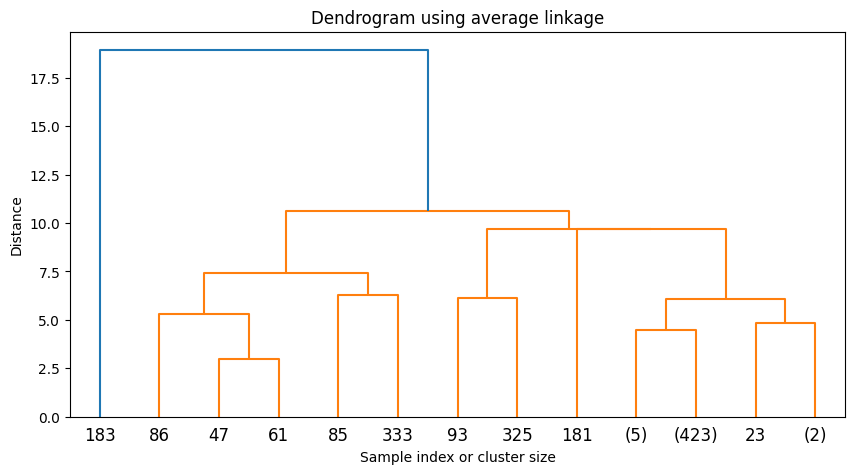

In [10]:
#Plot dendogram to see how clusters are formed
linkage_methods = ['single', 'complete', 'average']
for method in linkage_methods:
    linkage_matrix = linkage(X_scaled, method=method)
    plt.figure(figsize=(10, 5))
    dendrogram(linkage_matrix, truncate_mode='level', p=5)
    plt.title(f"Dendrogram using {method} linkage")
    plt.xlabel("Sample index or cluster size")
    plt.ylabel("Distance")
    plt.show()


In [12]:
#choosing the linkage method and number of clusters
clustering = AgglomerativeClustering(n_clusters=4, linkage='complete')
data['cluster_label'] = clustering.fit_predict(X_scaled)

In [13]:
#checking the number of data pounts in each cluster
print(data['cluster_label'].value_counts())

cluster_label
0    427
2     10
1      2
3      1
Name: count, dtype: int64


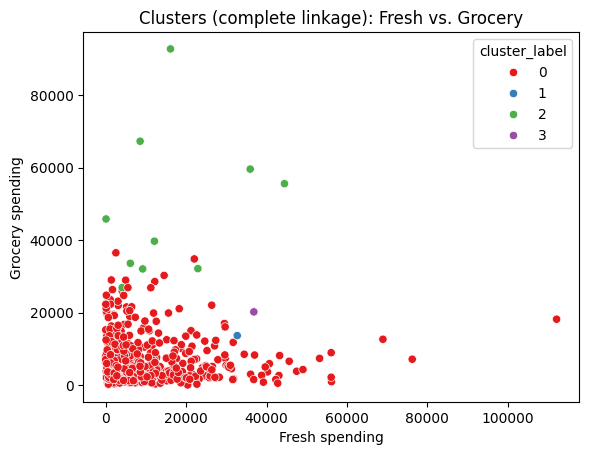

In [15]:
#Visualize the clusters
sns.scatterplot(x=data['Fresh'], y=data['Grocery'], hue=data['cluster_label'], palette='Set1')
plt.title("Clusters (complete linkage): Fresh vs. Grocery")
plt.xlabel("Fresh spending")
plt.ylabel("Grocery spending")
plt.show()

In [16]:
#summarize the clusters by itss mean spending values
cluster_summary = data.groupby('cluster_label')[features].mean()
print(cluster_summary)

                      Fresh          Milk       Grocery        Frozen  \
cluster_label                                                           
0              11802.351288   5010.416862   6972.681499   2783.822014   
1              22015.500000   9937.000000   7844.000000  47939.000000   
2              15964.900000  34708.500000  48536.900000   3054.600000   
3              36847.000000  43950.000000  20170.000000  36534.000000   

               Detergents_Paper  delicatessen  
cluster_label                                  
0                   2382.957845   1370.644028  
1                    671.500000   4153.500000  
2                  24875.200000   2942.800000  
3                    239.000000  47943.000000  
